### Prediction Using Supervised ML

* Predict the percentage of an student based on the no. of study hours. 
* This is a simple linear regression task as it involves just 2 variables.
* Data is taken from http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/ day? 


>**`Author - Shubham Sinha`**

In [95]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# importing the data from the link

data = pd.read_csv("http://bit.ly/w-data")

In [97]:
# viewing the data

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [98]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [100]:
# checking for missing data

data.isna().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing the data

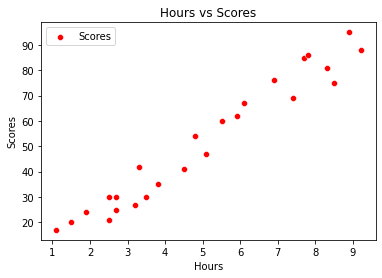

In [101]:
# making a scatterplot

sns.scatterplot(x = "Hours",y = "Scores",data = data,color = "red",label = "Scores")
plt.title("Hours vs Scores");

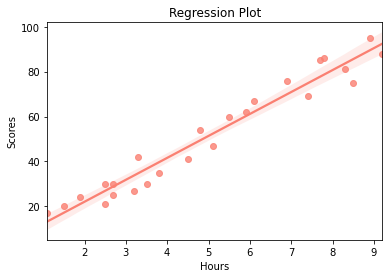

In [102]:
# making a regressionplot

sns.regplot(x= "Hours", y= "Scores",data = data,label = "Scores",color = "salmon")
plt.title('Regression Plot');

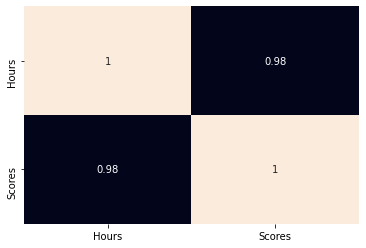

In [103]:
# creating a correlation matrix

corr_mat = data.corr()
sns.heatmap(corr_mat,annot=True,cbar = False);

### Creating and Training the model

In [104]:
from sklearn.model_selection import train_test_split

# splitting into training and test sets

X = data.drop("Scores",axis = 1) 
y = data["Scores"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [105]:
# fitting the model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [106]:
# getting the predictions

y_preds = reg.predict(X_test)
y_preds

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

In [107]:
# Accurcay of the model

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f"The mean absolute error of the model is {mean_absolute_error(y_test,y_preds):.3f}")
print(f"The mean squared error of the model is {mean_squared_error(y_test,y_preds):.3f}")

The mean absolute error of the model is 4.938
The mean squared error of the model is 26.676


In [108]:
# printing r2_score

print(f"The r2_score of the model is {r2_score(y_test,y_preds)*100:.3f}")

The r2_score of the model is 93.776


### Predicting the marks of student if study hours/day = 9.25

In [109]:
hours = [9.25]
score = reg.predict([hours])
print(f"The marks of the student is {score[0]:.2f}")

The marks of the student is 92.55
